In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
bdi2_df=pd.read_csv('NSS data_BDI2 scores_20200101-20230131_20241106.csv')

C:\Users\khare\AppData\Local\Temp\ipykernel_46620\1585778097.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  bdi2_df=pd.read_csv('NSS data_BDI2 scores_20200101-20230131_20241106.csv')


In [3]:
bdi2_df.head(5)

,StudentID,studentAssessmentID,resultStudentDomainID,Student TEIDS ID,domainID,domainText,ScoreTypeID,ScoreTypeText,StaffExternalID,testDate,...,AESign,isSSRequired,stdDevScore1,stdDevScore2,stdDevScore3,NCESign,totalCSS,totalCSSMin,totalCSSMax,NormType
0,2224693,8625078,138104116,52101,7,Self-Care,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,322.0,301.0,343.0,2
1,2224693,8625078,138104117,52101,10,Adult Interaction,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,413.0,403.0,423.0,2
2,2224693,8625078,138104118,52101,12,Self-Concept and Social Role,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,365.0,355.0,375.0,2
3,2224693,8625078,138104119,52101,14,Receptive Communication,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,343.0,333.0,353.0,2
4,2224693,8625078,138104120,52101,15,Expressive Communication,2.0,ItemDetails,34775.0,2/25/2022,...,NaN,1.0,NaN,NaN,NaN,NaN,288.0,267.0,309.0,2


In [4]:
#bdi2_df.info()

In [5]:
#bdi2_df = bdi2_df.set_index('Student TEIDS ID')

In [6]:
#Piovat table to get DQ score column_wise

pivoted_bdi2 = bdi2_df.pivot_table(
    index='Student TEIDS ID', 
    columns='domainText', 
    values=['DQScore', 'rawScore', 'ZScore']  
    
)

In [7]:
 condensed_bdi2 = pivoted_bdi2.loc[:, pivoted_bdi2.columns.isin(['rawScore','DQScore','ZScore'], level=0)]
 condensed_bdi2.head(5)


DQScore                                                 \
domainText       Adaptive Cognitive Communication  Motor Personal-Social   
Student TEIDS ID                                                           
52101                80.0      97.0          73.0   95.0           115.0   
416571               65.0      66.0          70.0   91.0            67.0   
419105               95.0      77.0          85.0  107.0            75.0   
419833              105.0     104.0         130.0  119.0            90.0   
423227               65.0      59.0          55.0   82.0            60.0   

                   ZScore                                                   \
domainText       Adaptive Adult Interaction Attention and Memory Cognitive   
Student TEIDS ID                                                             
52101               -1.33              1.67                -0.33     -0.20   
416571              -2.33             -1.67                -2.00     -2.27   
419105              -0.33             -0.67                -1.00     -1.53   
419833               0.33             -0.33                 0.67      0.27   
423227              -2.33             -3.00                -2.33     -2.73   

                                ...         rawScore                          \
domainText       Communication  ... Peer Interaction Perception and Concepts   
Student TEIDS ID                ...                                            
52101                     -1.8  ...              NaN                     5.0   
416571                    -2.0  ...              8.0                    14.0   
419105                    -1.0  ...              6.0                    18.0   
419833                     2.0  ...              8.0                    24.0   
423227                    -3.0  ...              4.0                    12.0   

                                                                           \
domainText       Perceptual Motor Personal Responsibility Personal-Social   
Student TEIDS ID                                                            
52101                         NaN                     NaN            20.0   
416571                       15.0                     1.0            65.0   
419105                       20.0                     7.0            82.0   
419833                       20.0                    10.0            97.0   
423227                       14.0                     0.0            38.0   

                                                                        \
domainText       Reasoning and Academic Skills Receptive Communication   
Student TEIDS ID                                                         
52101                                      NaN                     4.0   
416571                                     8.0                    27.0   
419105                                    10.0                    32.0   
419833                                    12.0                    41.0   
423227                                     4.0                    22.0   

                                                      \
domainText       Screener Test Total Score Self-Care   
Student TEIDS ID                                       
52101                                  NaN       2.0   
416571                                 NaN      32.0   
419105                                 NaN      46.0   
419833                                 NaN      47.0   
423227                                 NaN      32.0   

                                               
domainText       Self-Concept and Social Role  
Student TEIDS ID                               
52101                                     6.0  
416571                                   20.0  
419105                                   32.0  
419833                                   44.0  
423227                                   14.0  

[5 rows x 42 columns]

In [8]:
 #Remove the level 0 index and reset the row index
 condensed_bdi2 = condensed_bdi2.droplevel(0,axis=1)
 condensed_bdi2 = condensed_bdi2.reset_index(level='Student TEIDS ID')

In [9]:
 condensed_bdi2.head(5)

domainText,Student TEIDS ID,Adaptive,Cognitive,Communication,Motor,Personal-Social,Adaptive,Adult Interaction,Attention and Memory,Cognitive,...,Peer Interaction,Perception and Concepts,Perceptual Motor,Personal Responsibility,Personal-Social,Reasoning and Academic Skills,Receptive Communication,Screener Test Total Score,Self-Care,Self-Concept and Social Role
0,52101,80.0,97.0,73.0,95.0,115.0,-1.33,1.67,-0.33,-0.20,...,NaN,5.0,NaN,NaN,20.0,NaN,4.0,NaN,2.0,6.0
1,416571,65.0,66.0,70.0,91.0,67.0,-2.33,-1.67,-2.00,-2.27,...,8.0,14.0,15.0,1.0,65.0,8.0,27.0,NaN,32.0,20.0
2,419105,95.0,77.0,85.0,107.0,75.0,-0.33,-0.67,-1.00,-1.53,...,6.0,18.0,20.0,7.0,82.0,10.0,32.0,NaN,46.0,32.0
3,419833,105.0,104.0,130.0,119.0,90.0,0.33,-0.33,0.67,0.27,...,8.0,24.0,20.0,10.0,97.0,12.0,41.0,NaN,47.0,44.0
4,423227,65.0,59.0,55.0,82.0,60.0,-2.33,-3.00,-2.33,-2.73,...,4.0,12.0,14.0,0.0,38.0,4.0,22.0,NaN,32.0,14.0


In [10]:
#Now we need to rename all of the columns, to know which scores are associated with each domain
start_col = 1
end_col = 6
for i in range(start_col, end_col): 
    # Add the prefix to the column name at index i
    condensed_bdi2.columns.values[i] = 'DQScore_' + condensed_bdi2.columns.values[i]

In [11]:
start_col = 6
end_col = 24
for i in range(start_col, end_col): 
    # Add the prefix to the column name at index i
    condensed_bdi2.columns.values[i] = 'ZScore_' + condensed_bdi2.columns.values[i]

In [12]:
start_col = 24
end_col = 43
for i in range(start_col, end_col): 
    # Add the prefix to the column name at index i
    condensed_bdi2.columns.values[i] = 'rawScore_' + condensed_bdi2.columns.values[i]

In [13]:
#Add column for program label
condensed_bdi2['Program Label'] = 'Entrance'

In [14]:
#remove na and XXXX value and later merge with bdi2_df to get TestDate

bdi2_drop_na = bdi2_df.dropna(subset=['Student TEIDS ID'])
bdi2_drop_na = bdi2_drop_na.dropna(subset=['testDate'])
bdi2_drop_na = bdi2_drop_na.drop(bdi2_drop_na[bdi2_drop_na['Student TEIDS ID']=='xxxxxxx'].index)
#bdi2_drop_na

In [15]:
unique_student = pd.unique(bdi2_drop_na['Student TEIDS ID'])
#unique_student

In [16]:
unique_student_df = pd.DataFrame(unique_student, columns=['Student TEIDS ID'])
#unique_student_df 

In [17]:
merged_student_testDate = pd.merge(unique_student_df, bdi2_drop_na[['Student TEIDS ID', 'testDate']], on='Student TEIDS ID', how='inner')
merged_student_testDate = merged_student_testDate.drop_duplicates(subset='Student TEIDS ID', keep='first')
# merged_student_testDate

In [18]:
final_bdi2 = pd.merge(condensed_bdi2, merged_student_testDate[['Student TEIDS ID', 'testDate']], on='Student TEIDS ID', how='inner')
final_bdi2

,Student TEIDS ID,DQScore_Adaptive,DQScore_Cognitive,DQScore_Communication,DQScore_Motor,DQScore_Personal-Social,ZScore_Adaptive,ZScore_Adult Interaction,ZScore_Attention and Memory,ZScore_Cognitive,...,rawScore_Perceptual Motor,rawScore_Personal Responsibility,rawScore_Personal-Social,rawScore_Reasoning and Academic Skills,rawScore_Receptive Communication,rawScore_Screener Test Total Score,rawScore_Self-Care,rawScore_Self-Concept and Social Role,Program Label,testDate
0,52101,80.0,97.0,73.0,95.0,115.0,-1.33,1.67,-0.33,-0.20,...,NaN,NaN,20.0,NaN,4.0,NaN,2.0,6.0,Entrance,2/25/2022
1,416571,65.0,66.0,70.0,91.0,67.0,-2.33,-1.67,-2.00,-2.27,...,15.0,1.0,65.0,8.0,27.0,NaN,32.0,20.0,Entrance,1/8/2020
2,419105,95.0,77.0,85.0,107.0,75.0,-0.33,-0.67,-1.00,-1.53,...,20.0,7.0,82.0,10.0,32.0,NaN,46.0,32.0,Entrance,2/27/2020
3,419833,105.0,104.0,130.0,119.0,90.0,0.33,-0.33,0.67,0.27,...,20.0,10.0,97.0,12.0,41.0,NaN,47.0,44.0,Entrance,2/21/2020
4,423227,65.0,59.0,55.0,82.0,60.0,-2.33,-3.00,-2.33,-2.73,...,14.0,0.0,38.0,4.0,22.0,NaN,32.0,14.0,Entrance,2/14/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17351,550166,90.0,87.0,57.0,90.0,78.0,-0.67,-1.00,-0.67,-0.87,...,NaN,NaN,40.0,NaN,15.0,NaN,28.0,11.0,Entrance,3/22/2022
17352,571437,90.0,88.0,85.0,95.0,77.0,-0.67,-2.00,-0.67,-0.80,...,16.0,10.0,57.0,10.0,26.0,NaN,26.0,18.0,Entrance,1/17/2020
17353,580447,60.0,83.0,84.0,78.0,78.0,-2.67,-0.67,-1.00,-1.13,...,NaN,NaN,6.0,NaN,5.0,NaN,0.0,1.0,Entrance,8/24/2022
17354,580709,70.0,68.0,65.0,81.0,65.0,-2.00,-2.67,-2.33,-2.13,...,12.0,4.0,56.0,12.0,20.0,NaN,31.0,12.0,Entrance,11/16/2022


In [19]:
#Adding total DQ score averageing from 5 DQ score


columns_to_average = [
    'DQScore_Adaptive', 
    'DQScore_Cognitive', 
    'DQScore_Communication', 
    'DQScore_Motor', 
    'DQScore_Personal-Social'
]
# Add a new column with the average of the selected columns

final_bdi2['Total_DQScore'] = final_bdi2[columns_to_average].mean(axis=1)



In [20]:
final_bdi2.head(5)

,Student TEIDS ID,DQScore_Adaptive,DQScore_Cognitive,DQScore_Communication,DQScore_Motor,DQScore_Personal-Social,ZScore_Adaptive,ZScore_Adult Interaction,ZScore_Attention and Memory,ZScore_Cognitive,...,rawScore_Personal Responsibility,rawScore_Personal-Social,rawScore_Reasoning and Academic Skills,rawScore_Receptive Communication,rawScore_Screener Test Total Score,rawScore_Self-Care,rawScore_Self-Concept and Social Role,Program Label,testDate,Total_DQScore
0,52101,80.0,97.0,73.0,95.0,115.0,-1.33,1.67,-0.33,-0.20,...,NaN,20.0,NaN,4.0,NaN,2.0,6.0,Entrance,2/25/2022,92.0
1,416571,65.0,66.0,70.0,91.0,67.0,-2.33,-1.67,-2.00,-2.27,...,1.0,65.0,8.0,27.0,NaN,32.0,20.0,Entrance,1/8/2020,71.8
2,419105,95.0,77.0,85.0,107.0,75.0,-0.33,-0.67,-1.00,-1.53,...,7.0,82.0,10.0,32.0,NaN,46.0,32.0,Entrance,2/27/2020,87.8
3,419833,105.0,104.0,130.0,119.0,90.0,0.33,-0.33,0.67,0.27,...,10.0,97.0,12.0,41.0,NaN,47.0,44.0,Entrance,2/21/2020,109.6
4,423227,65.0,59.0,55.0,82.0,60.0,-2.33,-3.00,-2.33,-2.73,...,0.0,38.0,4.0,22.0,NaN,32.0,14.0,Entrance,2/14/2020,64.2


In [21]:
# BDI3 data frame
bdi3_df = pd.read_excel('NSS data_BDI3 Scores 20230101 20240630_Compiled_20241107.xlsx')

In [22]:
bdi3_df.head(5)

,Last Name,First Name,Gender,Date of Birth,Location - Root Level (PC),Location - Root Level (AH),Location - Sub Level 1,Location - Sub Level 2,Location - Sub Level 3,Child ID,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Greater Nashville,NaN,NaN,474074,...,13.0,4.0,2,25,1990-01-01 00:00:00,464.0,450 - 479,2.00,30.0,8
1,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Greater Nashville,NaN,NaN,474186,...,24.0,8.0,25,40,68/90,510.0,502 - 517,0.67,43.0,36
2,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Upper Cumberland,NaN,NaN,474641,...,26.0,9.0,37,42,77/90,514.0,507 - 522,0.33,47.0,43
3,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,Southwest,NaN,NaN,474848,...,17.0,6.0,9,32,25/90,487.0,476 - 497,1.33,37.0,22
4,NaN,NaN,NaN,NaN,NaN,Tennessee Early Intervention Sys,South Central,NaN,NaN,474967,...,12.0,3.0,1,22,1990-01-01 00:00:00,451.0,429 - 473,2.33,27.0,1


In [23]:
# columns = bdi3_df.columns.tolist()
# print(columns)

In [24]:
#Pull only required column

bdi3_columns=bdi3_df[['TEIDS Child ID',
'Adaptive Developmental Quotient',
'Adaptive Z-Score',
'Social-Emotional Developmental Quotient',
'Social-Emotional Z-Score',
'Communication Developmental Quotient',
'Motor Developmental Quotient',
'Cognitive Developmental Quotient',
'Cognitive Z-Score',
'BDI-3 Total Developmental Quotient',
'BDI-3 Total Z-Score',
'Adaptive-Self Care RS',
'Adaptive-Self Care Z-Score',
'Adaptive-Personal Responsibility RS',
'Adaptive-Personal Responsibility Z-Score',
'Social Emotional-Adult Interaction RS',
'Social Emotional-Adult Interaction Z-Score',
'Social Emotional-Peer Interaction RS',
'Social Emotional-Peer Interaction Z-Score',
'Social Emotional-Self Concept / Social Role RS',
'Social Emotional-Self Concept / Social Role Z-Score',
'Communication-Receptive Communication RS',
'Communication-Receptive Communication Z-Score',
'Communication-Expressive Communication RS',
'Communication-Expressive Communication Z-Score',
'Motor-Gross Motor RS',
'Motor-Gross Motor Z-Score',
'Motor-Fine Motor RS',
'Motor-Fine Motor Z-Score',
'Motor-Perceptual Motor RS',
'Motor-Perceptual Motor Z-Score',
'Cognitive-Attention and Memory RS',
'Cognitive-Attention and Memory Z-Score',
'Cognitive-Reasoning / Academic Skills RS',
'Cognitive-Reasoning / Academic Skills Z-Score',
'Cognitive-Perception and Concepts RS',
'Cognitive-Perception and Concepts Z-Score',
 'Program Label',
  'Adaptive-Self Care Date of Testing']]
                 

In [25]:

bdi3_columns.rename(columns={'Adaptive-Self Care Date of Testing': 'testDate'})
bdi3_columns.head(5)

,TEIDS Child ID,Adaptive Developmental Quotient,Adaptive Z-Score,Social-Emotional Developmental Quotient,Social-Emotional Z-Score,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,Cognitive Z-Score,BDI-3 Total Developmental Quotient,...,Motor-Perceptual Motor RS,Motor-Perceptual Motor Z-Score,Cognitive-Attention and Memory RS,Cognitive-Attention and Memory Z-Score,Cognitive-Reasoning / Academic Skills RS,Cognitive-Reasoning / Academic Skills Z-Score,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts Z-Score,Program Label,Adaptive-Self Care Date of Testing
0,474074.0,103.0,0.2,106.0,0.40,64.0,81.0,80.0,1.33,86.0,...,11.0,1.67,29.0,1.00,17.0,0.33,13.0,2.00,BDI-3 Annual Evaluation,2023-09-13
1,474186.0,112.0,0.8,108.0,0.53,91.0,91.0,92.0,0.53,98.0,...,17.0,0.33,30.0,1.00,20.0,0.33,24.0,0.67,BDI-3 Annual Evaluation,2023-10-26
2,474641.0,88.0,0.8,94.0,0.40,97.0,98.0,100.0,0.00,95.0,...,18.0,0.33,37.0,0.33,22.0,0.67,26.0,0.33,BDI-3 Annual Evaluation,2023-07-31
3,474848.0,64.0,2.4,86.0,0.93,94.0,98.0,88.0,0.80,85.0,...,19.0,0.33,30.0,0.67,17.0,0.00,17.0,1.33,BDI-3 Annual Evaluation,2023-08-04
4,474967.0,73.0,1.8,92.0,0.53,61.0,66.0,70.0,2.00,70.0,...,10.0,2.00,28.0,1.00,7.0,1.67,12.0,2.33,BDI-3 Annual Evaluation,2023-07-31


In [26]:
#dropping NAN values and removing rows that contain NAN values
bdi3_columns=bdi3_columns.dropna(axis=0)


In [27]:
bdi3_columns

,TEIDS Child ID,Adaptive Developmental Quotient,Adaptive Z-Score,Social-Emotional Developmental Quotient,Social-Emotional Z-Score,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,Cognitive Z-Score,BDI-3 Total Developmental Quotient,...,Motor-Perceptual Motor RS,Motor-Perceptual Motor Z-Score,Cognitive-Attention and Memory RS,Cognitive-Attention and Memory Z-Score,Cognitive-Reasoning / Academic Skills RS,Cognitive-Reasoning / Academic Skills Z-Score,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts Z-Score,Program Label,Adaptive-Self Care Date of Testing
0,474074.0,103.0,0.2,106.0,0.40,64.0,81.0,80.0,1.33,86.0,...,11.0,1.67,29.0,1.00,17.0,0.33,13.0,2.00,BDI-3 Annual Evaluation,2023-09-13
1,474186.0,112.0,0.8,108.0,0.53,91.0,91.0,92.0,0.53,98.0,...,17.0,0.33,30.0,1.00,20.0,0.33,24.0,0.67,BDI-3 Annual Evaluation,2023-10-26
2,474641.0,88.0,0.8,94.0,0.40,97.0,98.0,100.0,0.00,95.0,...,18.0,0.33,37.0,0.33,22.0,0.67,26.0,0.33,BDI-3 Annual Evaluation,2023-07-31
3,474848.0,64.0,2.4,86.0,0.93,94.0,98.0,88.0,0.80,85.0,...,19.0,0.33,30.0,0.67,17.0,0.00,17.0,1.33,BDI-3 Annual Evaluation,2023-08-04
4,474967.0,73.0,1.8,92.0,0.53,61.0,66.0,70.0,2.00,70.0,...,10.0,2.00,28.0,1.00,7.0,1.67,12.0,2.33,BDI-3 Annual Evaluation,2023-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34628,583314.0,85.0,1.0,94.0,0.40,58.0,111.0,98.0,0.13,91.0,...,12.0,0.33,30.0,0.33,10.0,0.33,11.0,1.00,BDI-3 Eligibility Evaluation,2024-06-26
34629,583315.0,97.0,0.2,106.0,0.40,82.0,117.0,108.0,0.53,104.0,...,15.0,0.67,33.0,0.33,14.0,0.33,19.0,0.67,BDI-3 Eligibility Evaluation,2024-06-28
34637,583456.0,85.0,1.0,106.0,0.40,73.0,81.0,82.0,1.20,85.0,...,7.0,2.33,29.0,0.33,8.0,1.00,11.0,1.67,BDI-3 Eligibility Evaluation,2024-06-27
34643,583529.0,103.0,0.2,94.0,0.40,91.0,115.0,108.0,0.53,103.0,...,15.0,1.33,31.0,0.67,10.0,0.33,14.0,0.33,BDI-3 Eligibility Evaluation,2024-06-30


In [28]:
# replace value with 'Entrance' for eligibility
bdi3_columns.loc[bdi3_columns["Program Label"] == "BDI-3 Eligibility Evaluation", "Program Label"] = "Entrance"

In [29]:
bdi3_columns['Program Label'].value_counts().get('Entrance',0)

7272

In [30]:
bdi2_columns=final_bdi2.rename(columns={'Student TEIDS ID': 'TEIDS Child ID',
                                     'DQScore_Adaptive': 'Adaptive Developmental Quotient',
                                     'DQScore_Cognitive': 'Cognitive Developmental Quotient',
                                     'DQScore_Communication': 'Communication Developmental Quotient',
                                     'DQScore_Motor': 'Motor Developmental Quotient',
                                     'DQScore_Personal-Social': 'Personal-Social Developmental Quotient',
                                     'ZScore_Adaptive': 'Adaptive Z-Score',
                                     'ZScore_Adult Interaction': 'Adult Interaction Z-Score',
                                     'ZScore_Attention and Memory': 'Attention and Memory Z-Score',
                                     'ZScore_Cognitive': 'Cognitive Z-Score',
                                     'rawScore_Perception and Concepts': 'Perception and Concepts RS',
                                     'rawScore_Perceptual Motor': 'Perceptual Motor RS',
                                     'rawScore_Personal Responsibility': 'Personal Responsibility RS',
                                     'rawScore_Personal-Social': 'Personal-Social RS',
                                     'rawScore_Reasoning and Academic Skills': 'Reasoning and Academic Skills RS',
                                     'rawScore_Receptive Communication': 'Receptive Communication RS',
                                     'rawScore_Screener Test Total Score': 'Screener Test Total Score RS',
                                     'rawScore_Self-Care': 'Self-Care RS',
                                     'rawScore_Self-Concept and Social Role': 'Self-Concept and Social Role RS'})

In [31]:
bdi2_columns.head(5)

,TEIDS Child ID,Adaptive Developmental Quotient,Cognitive Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Personal-Social Developmental Quotient,Adaptive Z-Score,Adult Interaction Z-Score,Attention and Memory Z-Score,Cognitive Z-Score,...,Personal Responsibility RS,Personal-Social RS,Reasoning and Academic Skills RS,Receptive Communication RS,Screener Test Total Score RS,Self-Care RS,Self-Concept and Social Role RS,Program Label,testDate,Total_DQScore
0,52101,80.0,97.0,73.0,95.0,115.0,-1.33,1.67,-0.33,-0.20,...,NaN,20.0,NaN,4.0,NaN,2.0,6.0,Entrance,2/25/2022,92.0
1,416571,65.0,66.0,70.0,91.0,67.0,-2.33,-1.67,-2.00,-2.27,...,1.0,65.0,8.0,27.0,NaN,32.0,20.0,Entrance,1/8/2020,71.8
2,419105,95.0,77.0,85.0,107.0,75.0,-0.33,-0.67,-1.00,-1.53,...,7.0,82.0,10.0,32.0,NaN,46.0,32.0,Entrance,2/27/2020,87.8
3,419833,105.0,104.0,130.0,119.0,90.0,0.33,-0.33,0.67,0.27,...,10.0,97.0,12.0,41.0,NaN,47.0,44.0,Entrance,2/21/2020,109.6
4,423227,65.0,59.0,55.0,82.0,60.0,-2.33,-3.00,-2.33,-2.73,...,0.0,38.0,4.0,22.0,NaN,32.0,14.0,Entrance,2/14/2020,64.2


In [32]:
#merge bdi2 and bdi3
bd_df_merge=pd.merge(bdi2_columns,bdi3_columns, on=['TEIDS Child ID','Program Label'],how='outer')

In [33]:
bd_df_merge

,TEIDS Child ID,Adaptive Developmental Quotient_x,Cognitive Developmental Quotient_x,Communication Developmental Quotient_x,Motor Developmental Quotient_x,Personal-Social Developmental Quotient,Adaptive Z-Score_x,Adult Interaction Z-Score,Attention and Memory Z-Score,Cognitive Z-Score_x,...,Motor-Fine Motor Z-Score,Motor-Perceptual Motor RS,Motor-Perceptual Motor Z-Score,Cognitive-Attention and Memory RS,Cognitive-Attention and Memory Z-Score,Cognitive-Reasoning / Academic Skills RS,Cognitive-Reasoning / Academic Skills Z-Score,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts Z-Score,Adaptive-Self Care Date of Testing
0,52101,80.0,97.0,73.0,95.0,115.0,-1.33,1.67,-0.33,-0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,416571,65.0,66.0,70.0,91.0,67.0,-2.33,-1.67,-2.00,-2.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,419105,95.0,77.0,85.0,107.0,75.0,-0.33,-0.67,-1.00,-1.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,419833,105.0,104.0,130.0,119.0,90.0,0.33,-0.33,0.67,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,423227,65.0,59.0,55.0,82.0,60.0,-2.33,-3.00,-2.33,-2.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34134,550166,90.0,87.0,57.0,90.0,78.0,-0.67,-1.00,-0.67,-0.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
34135,571437,90.0,88.0,85.0,95.0,77.0,-0.67,-2.00,-0.67,-0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
34136,580447,60.0,83.0,84.0,78.0,78.0,-2.67,-0.67,-1.00,-1.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
34137,580709,70.0,68.0,65.0,81.0,65.0,-2.00,-2.67,-2.33,-2.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [34]:
 entry_df = bd_df_merge[bd_df_merge["Program Label"] == "Entrance"]

In [35]:
entry_df

,TEIDS Child ID,Adaptive Developmental Quotient_x,Cognitive Developmental Quotient_x,Communication Developmental Quotient_x,Motor Developmental Quotient_x,Personal-Social Developmental Quotient,Adaptive Z-Score_x,Adult Interaction Z-Score,Attention and Memory Z-Score,Cognitive Z-Score_x,...,Motor-Fine Motor Z-Score,Motor-Perceptual Motor RS,Motor-Perceptual Motor Z-Score,Cognitive-Attention and Memory RS,Cognitive-Attention and Memory Z-Score,Cognitive-Reasoning / Academic Skills RS,Cognitive-Reasoning / Academic Skills Z-Score,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts Z-Score,Adaptive-Self Care Date of Testing
0,52101,80.0,97.0,73.0,95.0,115.0,-1.33,1.67,-0.33,-0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,416571,65.0,66.0,70.0,91.0,67.0,-2.33,-1.67,-2.00,-2.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,419105,95.0,77.0,85.0,107.0,75.0,-0.33,-0.67,-1.00,-1.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,419833,105.0,104.0,130.0,119.0,90.0,0.33,-0.33,0.67,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,423227,65.0,59.0,55.0,82.0,60.0,-2.33,-3.00,-2.33,-2.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34134,550166,90.0,87.0,57.0,90.0,78.0,-0.67,-1.00,-0.67,-0.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
34135,571437,90.0,88.0,85.0,95.0,77.0,-0.67,-2.00,-0.67,-0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
34136,580447,60.0,83.0,84.0,78.0,78.0,-2.67,-0.67,-1.00,-1.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
34137,580709,70.0,68.0,65.0,81.0,65.0,-2.00,-2.67,-2.33,-2.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


## read ECO dataset

In [37]:
echo_df = pd.read_excel('NSS_ECO Data Ind 3 FFY 2023-24 20241211.xlsx', sheet_name='ECO with Exit23-24 ')

In [38]:
#echo_df

In [39]:
data = {'Progress_Category': ['a', 'b', 'c', 'd', 'e', 'Uncategory'],
        'Counts': [86, 501, 151, 915, 2025, 2]}
outcome1_df = pd.DataFrame(data)

In [40]:
outcome1_df

,Progress_Category,Counts
0,a,86
1,b,501
2,c,151
3,d,915
4,e,2025
5,Uncategory,2


In [41]:
# outcome1_df.set_index('Progress_Category')['Counts'].plot(kind='pie',  autopct=lambda p: '{:.0f}'.format(p * outcome2_df['Counts'].sum() / 100),  figsize=(8,8))
# plt.title('Outcome 2 Distribution')
# plt.show()

## get final outcome data from Charlie and visualize

In [128]:
outcome1 = pd.read_excel('outcome.xlsx', sheet_name='outcome1')

In [130]:
outcome2 = pd.read_excel('outcome.xlsx', sheet_name='outcome2')

In [132]:
outcome3 = pd.read_excel('outcome.xlsx', sheet_name='outcome3')

In [149]:
outcome1

,Progress_Category,Old rule Number,Percentage Old Rule,New Rule Nummber,Percentage New Rule
0,a,602,0.092887,87,0.023641
1,b,493,0.076069,502,0.136413
2,c,788,0.121586,151,0.041033
3,d,2794,0.431106,915,0.248641
4,e,1804,0.278352,2025,0.550272
5,Total,6481,1.000000,3680,1.000000


In [134]:
#Droping Count column 
New_outcome1=outcome1.drop(columns=['Old rule Number', 'New Rule Nummber'])
New_outcome2=outcome2.drop(columns=['Old rule Number', 'New Rule Nummber'])
New_outcome3=outcome3.drop(columns=['Old rule Number', 'New Rule Nummber'])


In [136]:
#Droping 'Total' row
New_outcome1=New_outcome1.drop(index=[5])
New_outcome2=New_outcome2.drop(index=[5])
New_outcome3=New_outcome3.drop(index=[5])


In [138]:
New_outcome1

,Progress_Category,Percentage Old Rule,Percentage New Rule
0,a,0.092887,0.023641
1,b,0.076069,0.136413
2,c,0.121586,0.041033
3,d,0.431106,0.248641
4,e,0.278352,0.550272


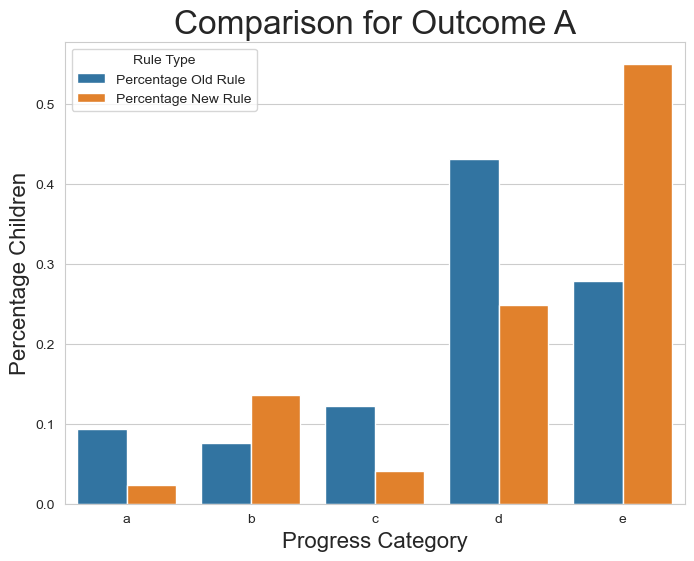

In [151]:
# Bar chart for outcome A
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Creating the bar chart
df_melted = New_outcome1.melt(id_vars="Progress_Category", var_name="Rule Type", value_name="Count")
sns.barplot(x="Progress_Category", y="Count", hue="Rule Type", data=df_melted)

# Adding labels and title
plt.xlabel("Progress Category", size=16)
plt.ylabel("Percentage Children", size=16)
plt.title("Comparison for Outcome A", size=24)
plt.legend(title="Rule Type")

# Show the plot
plt.show()

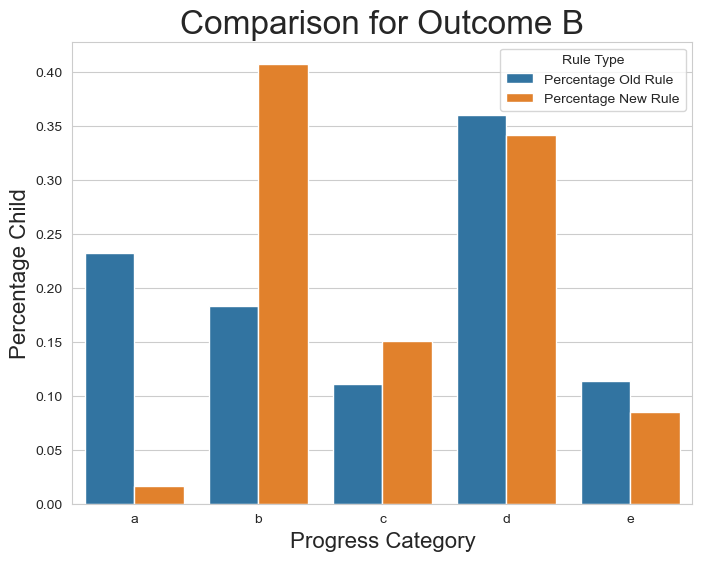

In [153]:
# Bar chart for outcome b
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Creating the bar chart
df_melted = New_outcome2.melt(id_vars="Progress_Category", var_name="Rule Type", value_name="Count")
sns.barplot(x="Progress_Category", y="Count", hue="Rule Type", data=df_melted)

# Adding labels and title
plt.xlabel("Progress Category", size=16)
plt.ylabel("Percenta Child", size=16)
plt.title("Comparison for Outcome B", size=24)
plt.legend(title="Rule Type")

# Show the plot
plt.show()

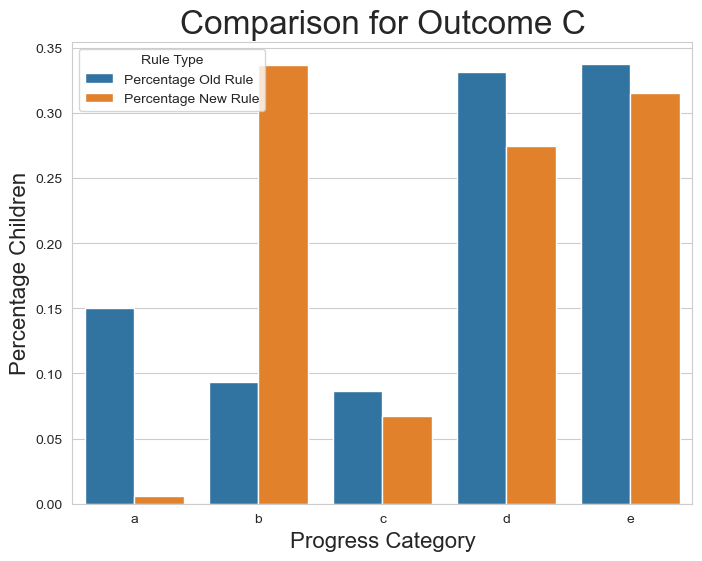

In [155]:
# Bar chart for outcome b
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Creating the bar chart
df_melted = New_outcome3.melt(id_vars="Progress_Category", var_name="Rule Type", value_name="Count")
sns.barplot(x="Progress_Category", y="Count", hue="Rule Type", data=df_melted)

# Adding labels and title
plt.xlabel("Progress Category", size=16)
plt.ylabel("Percentage Children", size=16)
plt.title("Comparison for Outcome C", size=24)
plt.legend(title="Rule Type")

# Show the plot
plt.show()

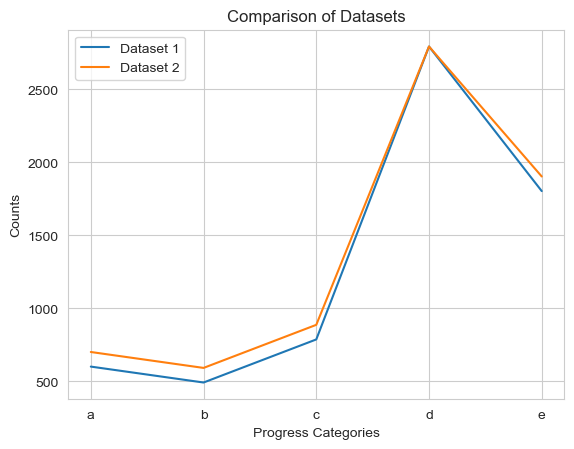

In [146]:
dataset1 = {'Progress_Categories': ['a', 'b', 'c', 'd', 'e'], 'Counts': [602, 493, 788, 2794, 1804]}
dataset2 = {'Progress_Categories': ['a', 'b', 'c', 'd', 'e'], 'Counts': [702, 593, 888, 2794, 1904]}
# Convert to DataFrame
df1 = pd.DataFrame(dataset1)
df2 = pd.DataFrame(dataset2)
# Plotting the data
plt.plot(df1['Progress_Categories'], df1['Counts'], label='Dataset 1')
plt.plot(df2['Progress_Categories'], df2['Counts'], label='Dataset 2')
plt.legend()
plt.xlabel('Progress Categories')
plt.ylabel('Counts')
plt.title('Comparison of Datasets')
plt.show()

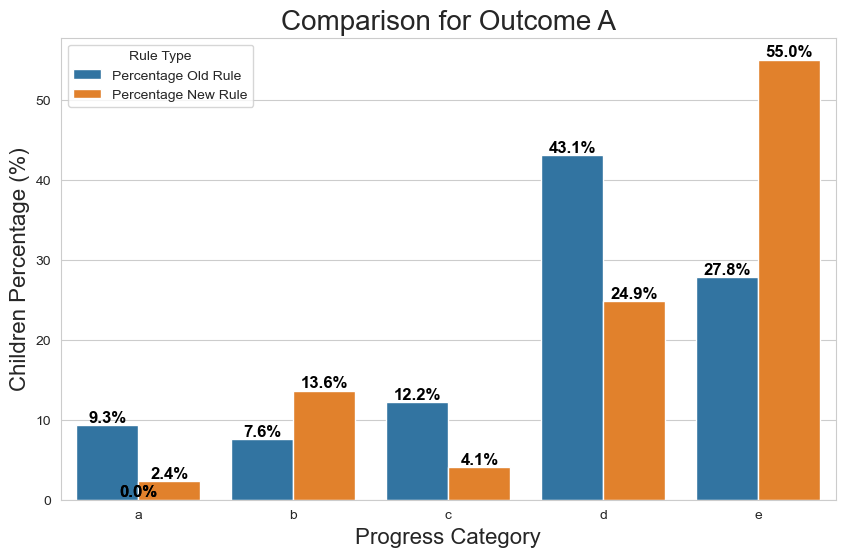

In [183]:

# Convert to percentage format (multiply by 100)
df_New = New_outcome1.melt(id_vars="Progress_Category", var_name="Rule Type", value_name="Percentage")
df_New["Percentage"] *= 100  # Convert to percentage

# Create figure
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar chart
ax = sns.barplot(x="Progress_Category", y="Percentage", hue="Rule Type", data=df_New)

# Annotate percentage values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Labels and title
plt.xlabel("Progress Category", size=16)
plt.ylabel("Children Percentage (%)", size=16)
plt.title("Comparison for Outcome A", size=20)
plt.legend(title="Rule Type")
plt.savefig("OutcomeA.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

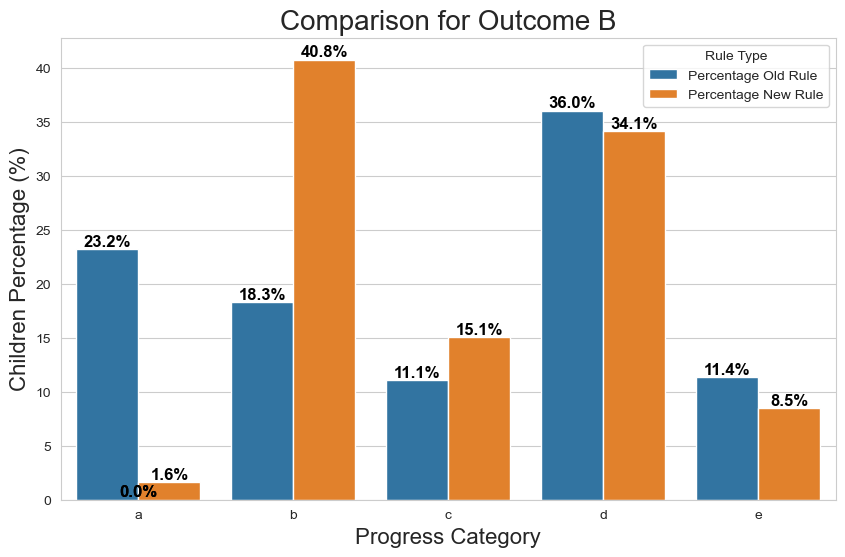

In [181]:
# Convert to percentage format (multiply by 100)
df_New = New_outcome2.melt(id_vars="Progress_Category", var_name="Rule Type", value_name="Percentage")
df_New["Percentage"] *= 100  # Convert to percentage

# Create figure
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar chart
ax = sns.barplot(x="Progress_Category", y="Percentage", hue="Rule Type", data=df_New)

# Annotate percentage values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Labels and title
plt.xlabel("Progress Category", size=16)
plt.ylabel("Children Percentage (%)", size=16)
plt.title("Comparison for Outcome B", size=20)
plt.legend(title="Rule Type")
plt.savefig("OutcomeB.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

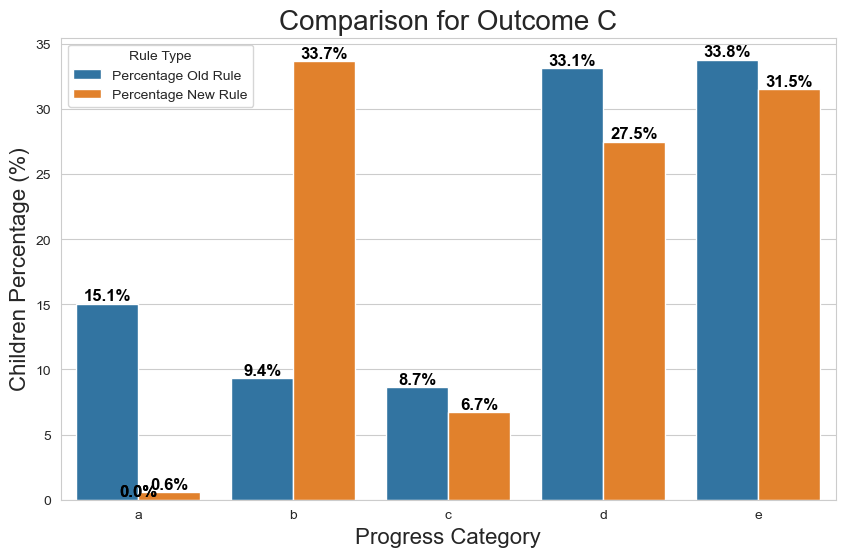

In [177]:
# Convert to percentage format (multiply by 100)
df_New = New_outcome3.melt(id_vars="Progress_Category", var_name="Rule Type", value_name="Percentage")
df_New["Percentage"] *= 100  # Convert to percentage

# Create figure
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar chart
ax = sns.barplot(x="Progress_Category", y="Percentage", hue="Rule Type", data=df_New)

# Annotate percentage values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Labels and title
plt.xlabel("Progress Category", size=16)
plt.ylabel("Children Percentage (%)", size=16)
plt.title("Comparison for Outcome C", size=20)
plt.legend(title="Rule Type")
plt.savefig("OutcomeC.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## Visualition of summary ststement

In [229]:
dataset1 = {'Outcomes Category': ['A', 'B', 'C'], 'New_Summary Statement 1 (%)': [.6441, .5373, .5000], 'New_Summary Statement 2 (%)': [.7989, .4255, .5902]}

# Convert to DataFrame
df_New = pd.DataFrame(dataset1)


In [231]:
df_New

,Outcomes Category,New_Summary Statement 1 (%),New_Summary Statement 2 (%)
0,A,0.6441,0.7989
1,B,0.5373,0.4255
2,C,0.5000,0.5902


In [237]:
dataset2 = {'Outcomes Category': ['A', 'B', 'C'], 'Old_Summary Statement 1 (%)': [.7659, .5315, .6311], 'Old_Summary Statement 2 (%)': [.7095, .4742, .6690]}

# Convert to DataFrame
df_Old = pd.DataFrame(dataset2)

In [239]:
df_Old

,Outcomes Category,Old_Summary Statement 1 (%),Old_Summary Statement 2 (%)
0,A,0.7659,0.7095
1,B,0.5315,0.4742
2,C,0.6311,0.6690


In [243]:
#merge both dataset
df_merged = df_New.merge(df_Old, on='Outcomes Category')

In [245]:
df_merged

,Outcomes Category,New_Summary Statement 1 (%),New_Summary Statement 2 (%),Old_Summary Statement 1 (%),Old_Summary Statement 2 (%)
0,A,0.6441,0.7989,0.7659,0.7095
1,B,0.5373,0.4255,0.5315,0.4742
2,C,0.5000,0.5902,0.6311,0.6690


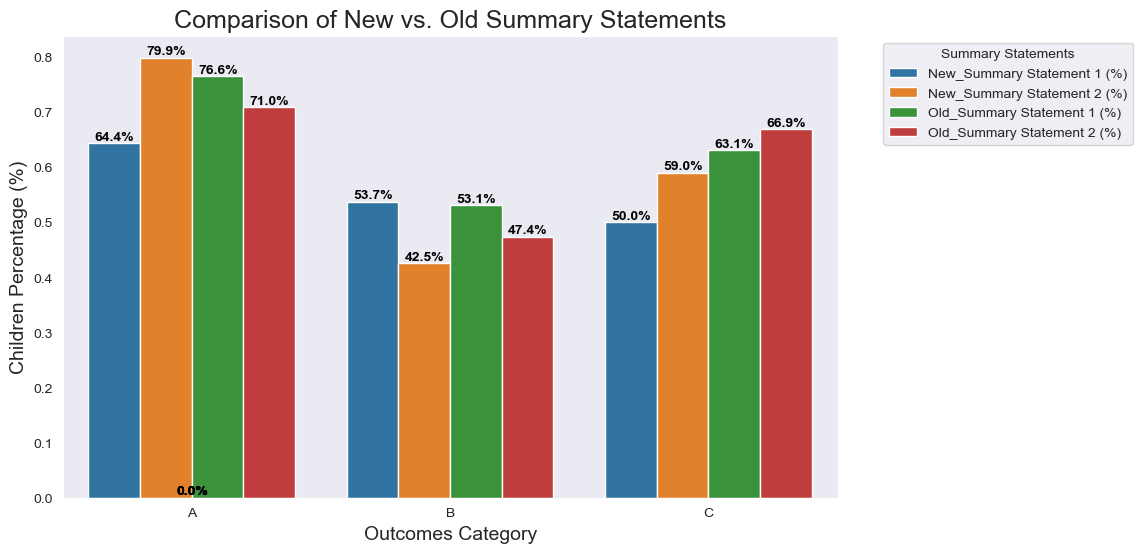

In [273]:
#Plot in barchart

df_melted = df_merged.melt(id_vars="Outcomes Category", var_name="Statement Type", value_name="Percentage")

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_style("dark")

# Create a grouped bar chart
ax = sns.barplot(x="Outcomes Category", y="Percentage", hue="Statement Type", data=df_melted)

# Annotate percentage values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Labels and title
plt.xlabel("Outcomes Category", size=14)
plt.ylabel("Children Percentage (%)", size=14)
plt.title("Comparison of New vs. Old Summary Statements", size=18)
plt.legend(title="Summary Statements", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [294]:
df_merged1 = df_merged[['Outcomes Category', 'New_Summary Statement 1 (%)', 'Old_Summary Statement 1 (%)', 'New_Summary Statement 2 (%)', 'Old_Summary Statement 2 (%)']]

In [296]:
df_merged1

,Outcomes Category,New_Summary Statement 1 (%),Old_Summary Statement 1 (%),New_Summary Statement 2 (%),Old_Summary Statement 2 (%)
0,A,0.6441,0.7659,0.7989,0.7095
1,B,0.5373,0.5315,0.4255,0.4742
2,C,0.5000,0.6311,0.5902,0.6690


In [387]:
df.to_csv('summary.csv', index=False)


C:\Users\khare\AppData\Local\Temp\ipykernel_46620\3172951188.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, fontweight='bold')


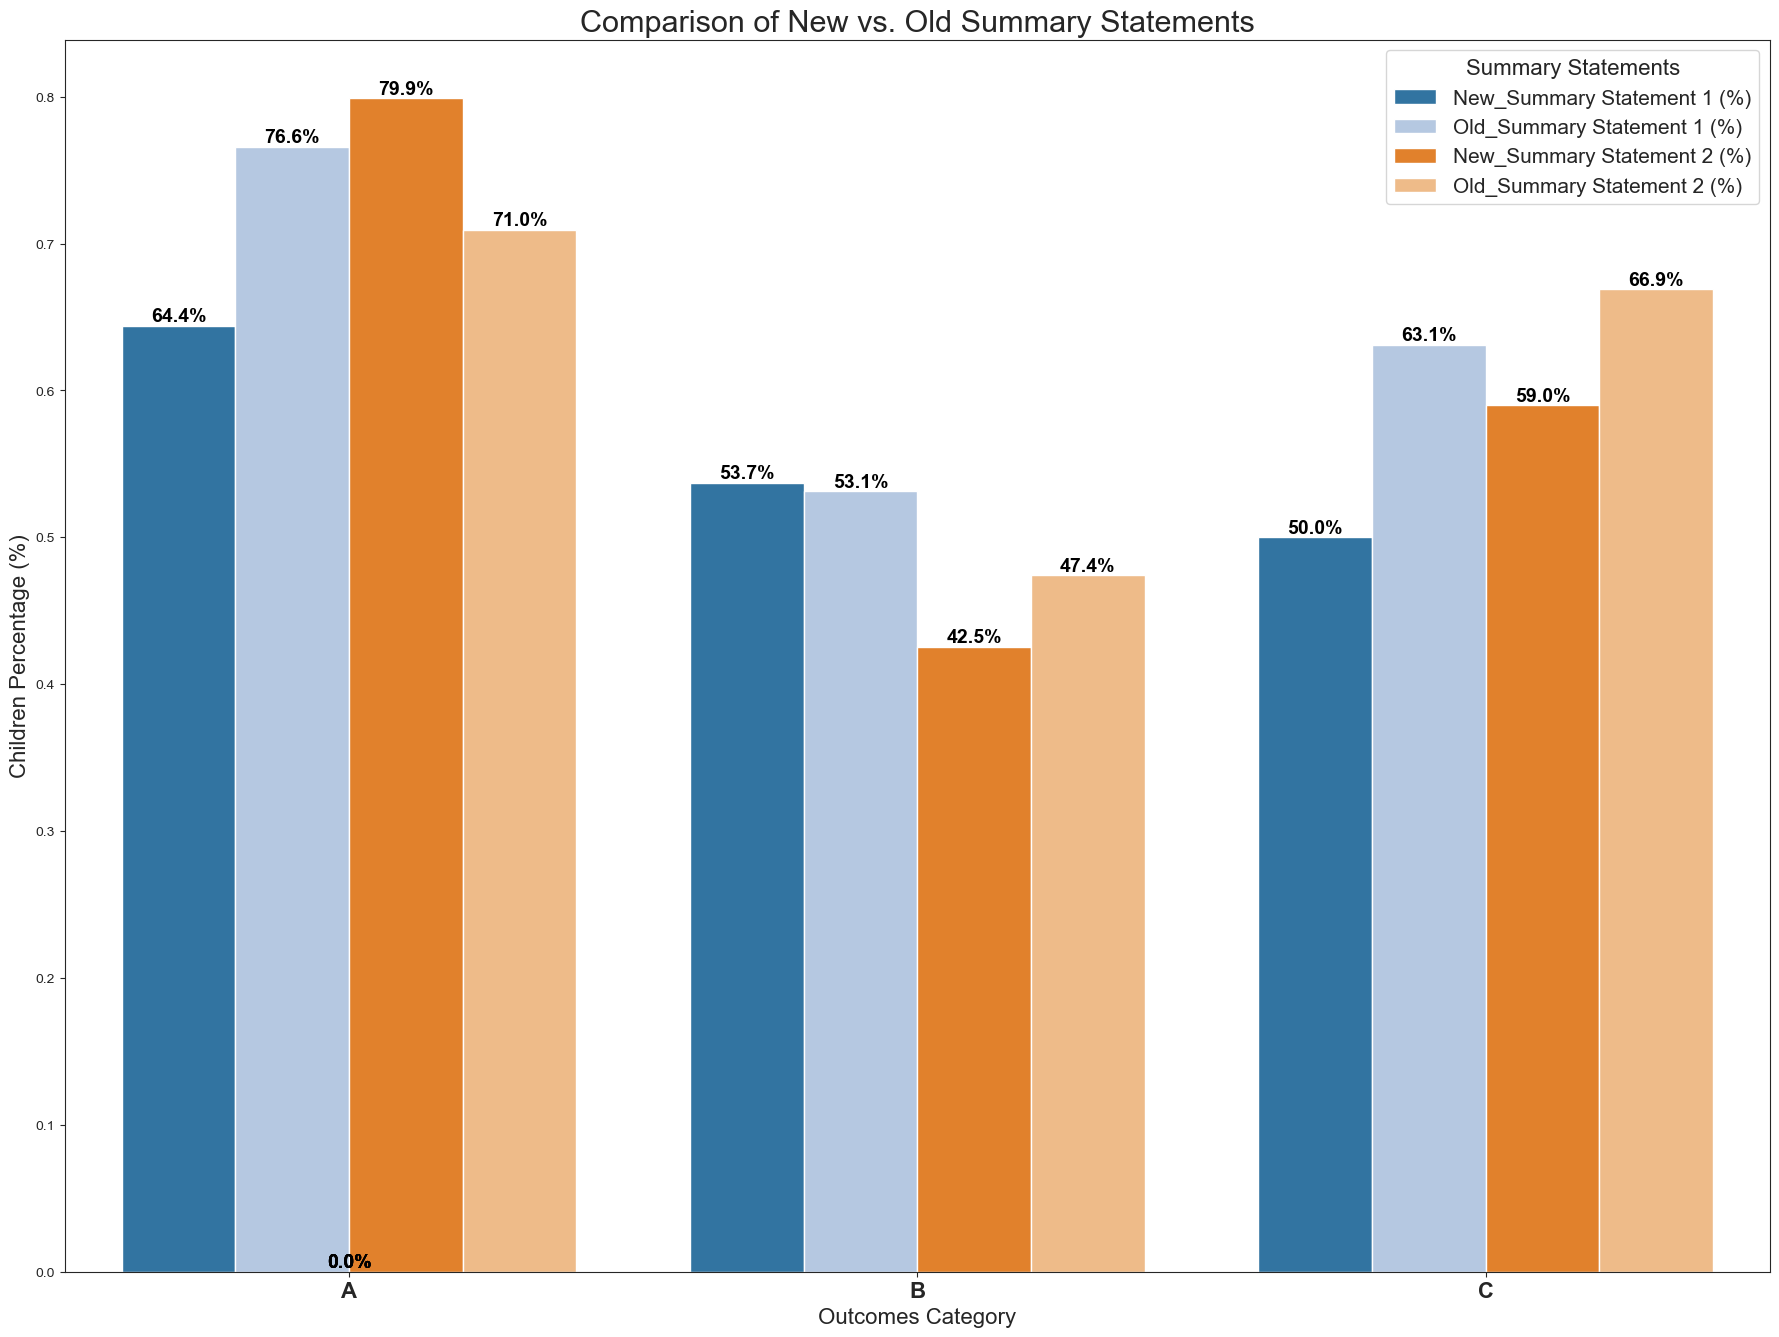

In [383]:
#column order differently, New and Old together

df_melted = df_merged1.melt(id_vars="Outcomes Category", var_name="Statement Type", value_name="Percentage")

# Create the plot
plt.figure(figsize=(22, 16))
sns.set_style("ticks")

# Define custom colors: Darker for "New", Lighter for "Old"
custom_palette = {
    'New_Summary Statement 1 (%)': '#1f77b4',  # Dark Blue
    'Old_Summary Statement 1 (%)': '#aec7e8',  # Light Blue
    'New_Summary Statement 2 (%)': '#ff7f0e',  # Dark Orange
    'Old_Summary Statement 2 (%)': '#ffbb78'   # Light Orange
}

# Create a grouped bar chart
ax = sns.barplot(x="Outcomes Category", y="Percentage", hue="Statement Type", data=df_melted, palette=custom_palette )

# Annotate percentage values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=14, color='black', weight='bold')

# Customize x-axis labels (A, B, C) to be bold and large
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, fontweight='bold')

# Labels and title
plt.xlabel("Outcomes Category", size=16)
plt.ylabel("Children Percentage (%)", size=16)
plt.title("Comparison of New vs. Old Summary Statements", size=22)
legend = plt.legend(title="Summary Statements", bbox_to_anchor=(1.00, 1), loc='best', 
                    fontsize=15, title_fontsize=16, frameon=True)
#plt.savefig("summary.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Table format

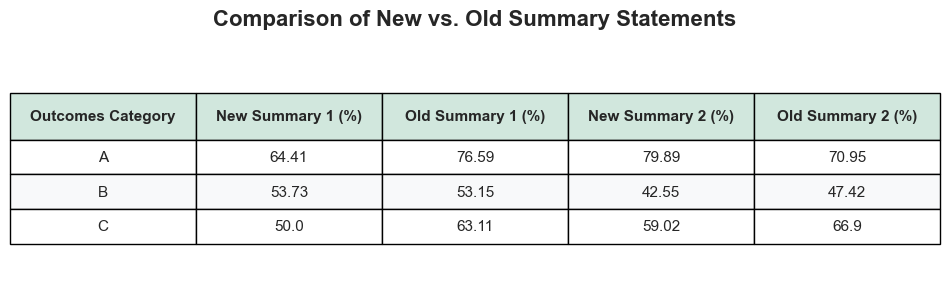

In [483]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Outcomes Category': ['A', 'B', 'C'],
    'New Summary 1 (%)': [64.41, 53.73, 50.00],
    'Old Summary 1 (%)': [76.59, 53.15, 63.11],
    'New Summary 2 (%)': [79.89, 42.55, 59.02],
    'Old Summary 2 (%)': [70.95, 47.42, 66.90]
}
df = pd.DataFrame(data)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 3))  # Increased figure height for better readability
ax.axis("tight")
ax.axis("off")

# Add the title
plt.title("Comparison of New vs. Old Summary Statements", fontsize=16, fontweight='bold', pad=20)

# Create a table and style it
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

# Style the table: Header customization and alternating row colors
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d1e7dd')  # Light green background for header
        cell.set_height(0.2)  # Increase header row height
    else:
        if i % 2 == 0:  # Even row
            cell.set_facecolor('#f8f9fa')  # Light gray for even rows
        else:  # Odd row
            cell.set_facecolor('#ffffff')  # White for odd rows
        cell.set_fontsize(14)
        cell.set_height(0.15)  # Increase row height

    cell.set_text_props(va='center', ha='center')  # Center text

# Save the table as a PNG image
plt.savefig("summary_table.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()